In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot
from scipy.stats import norm

In [2]:
df = pd.read_excel('/home/dsc/Master-Kschool/TFM/cleanned_data/df.xlsx')

In [3]:
df.head(3)

,PERSONA,SF_AH_CAPTACION_TT,ESTA_CARTERIZADO,CLIENTE_BBP,TIP_GESTOR,GESTOR,CARTERA_PATRON,CODIGO_CARTERA,DIGITAL_3_MESES,CAMINO_DIGITAL,...,EDAD,SEGMENTO_VALOR,SEGMENTO_RECORRIDO,DZ,OFICINA,LP_SEG_VIDA,LP_SEG_ACCIDENT,LP_SEG_MEDICOS,LP_SEG_MULTIRRIES,LP_SEG_AUTO
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287,ASESORAMIENTO FINANCIERO,14881,SI,COMPRADOR,...,69,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287,ASESORAMIENTO FINANCIERO,14881,SI,COMPRADOR,...,81,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0
2,3,1142234.34,SI,NO,ASESOR FINANCIERO,18287,TUTELA,28332,NO,SIN USO,...,75,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0


In [4]:
df.isna().any();

In [5]:
df.dtypes;

In [6]:
df[['PERSONA','GESTOR', 'CODIGO_CARTERA','LP_DOMIC_INGRESOS','LP_TARJ_CREDITO',
   'LP_TARJ_REVOLVING','LP_REC_LTGA_OTR','LP_OFIC_INTERNET','DZ','OFICINA',
   'LP_SEG_VIDA','LP_SEG_ACCIDENT','LP_SEG_MEDICOS','LP_SEG_MULTIRRIES','LP_SEG_AUTO']] = df[['PERSONA',
   'GESTOR', 'CODIGO_CARTERA','LP_DOMIC_INGRESOS','LP_TARJ_CREDITO',
   'LP_TARJ_REVOLVING','LP_REC_LTGA_OTR','LP_OFIC_INTERNET','DZ','OFICINA',
   'LP_SEG_VIDA','LP_SEG_ACCIDENT','LP_SEG_MEDICOS','LP_SEG_MULTIRRIES','LP_SEG_AUTO']].astype(object);

In [7]:
df.EDAD = df.EDAD.astype(int);

In [8]:
df.dtypes;

# Contexto y Analisis descriptivo Data Frame

##  - Informacion Generica Direcciones de Zona y Oficinas

In [9]:
# ========== 1 Numero Total de Direcciones de Zona ==========
df['DZ'].nunique()

11

In [10]:
# ========== 2 Numero Total de Oficinas ==========
df['OFICINA'].nunique()

162

In [11]:
# ========== Numero Total de Oficinas por Direccion de Zona ==========
dz = df.groupby(['DZ'])['OFICINA'].nunique()
dz

DZ
1     15
2     13
3     17
4     16
5     17
6     15
7     13
8     11
9     16
10    15
11    14
Name: OFICINA, dtype: int64

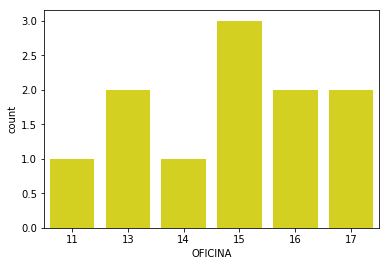

In [15]:
# ========== Grafica Distribucion de las Direcciones de Zona segun Numero de oficnas
# ========== 1 DZ con 11 Oficinas
# ========== 2 DZ con 13 Oficinas
# ========== 1 DZ con 14 Oficinas
# ========== 3 DZ con 15 Oficinas
# ========== 2 DZ con 16 Oficinas
# ========== 2 DZ con 17 Oficinas

sns.countplot(dz, color ='#F1ED03')

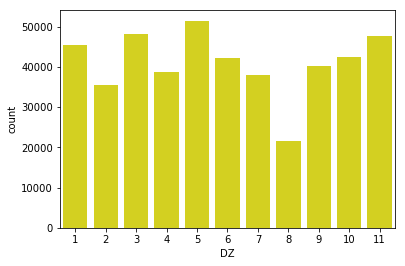

In [18]:
# ========== Grafica Numero clientes por DZ ==========
sns.countplot(data=df, x='DZ', color ='#F1ED03')

##  - Informacion Generica Clientes

In [19]:
# ========== 3 Numero total de Clientes ==========
df['PERSONA'].nunique()

451374

In [20]:
# ========== Informacion descriptiva Edad de los Clientes ==========
print(df['EDAD'].describe())

count    451374.000000
mean         58.268941
std          19.018368
min           0.000000
25%          45.000000
50%          60.000000
75%          73.000000
max         118.000000
Name: EDAD, dtype: float64


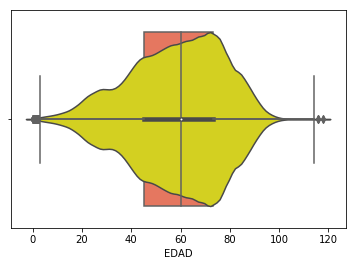

In [22]:
# ========== Grafica convinada descriptiva Edad de los Clientes ==========
sns.violinplot(x=df['EDAD'], color ='#F1ED03')
sns.boxplot(x=df['EDAD'], palette="Reds")

In [23]:
#sns.boxplot(x=df['EDAD'], palette="versicolor") #ASI VEO TODOS LOS COLORES.  ESTO HAY QUITARLO LUEGO

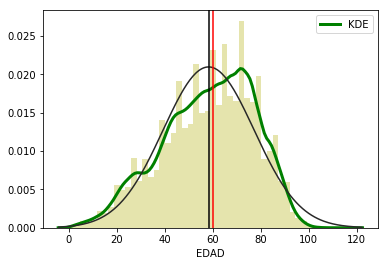

In [26]:
# ========== Grafica convinada descriptiva Edad de los Clientes ==========
distplot(df.EDAD, fit = norm, color = '#C0BD34',kde_kws={"color": "G", "lw": 3, "label": "KDE"});
plt.axvline(df['EDAD'].mean(), color='black')
plt.axvline(df['EDAD'].median(), color='red')